# Section 15: Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, confusion_matrix, classification_report

## Classification with Support Vector Machines

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


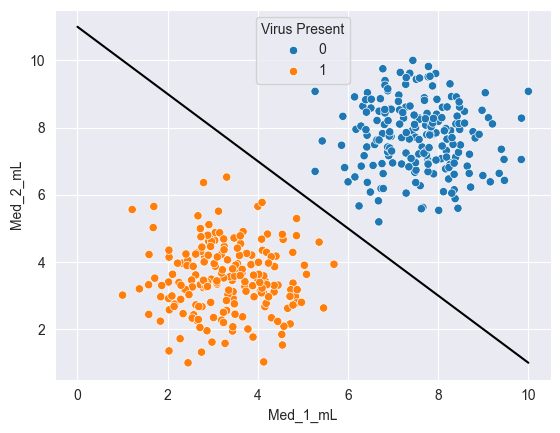

In [4]:
sns.scatterplot(df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b

plt.plot(x, y, 'black')

In [5]:
y = df['Virus Present'].values
X = df.drop('Virus Present', axis=1).values

In [6]:
model = SVC(kernel='linear', C=1000)

In [7]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [8]:
# CODE SOURCE IS FROM DOCUMENTATION (MODIFIED)
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def plot_svm_boundary(model,X,y):
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='seismic')
    
    # Plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.show()

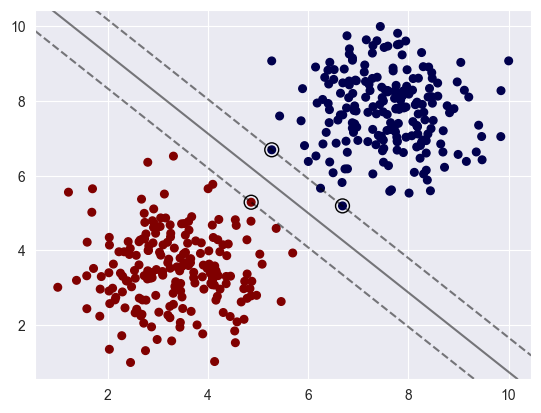

In [9]:
plot_svm_boundary(model, X, y)

In [10]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

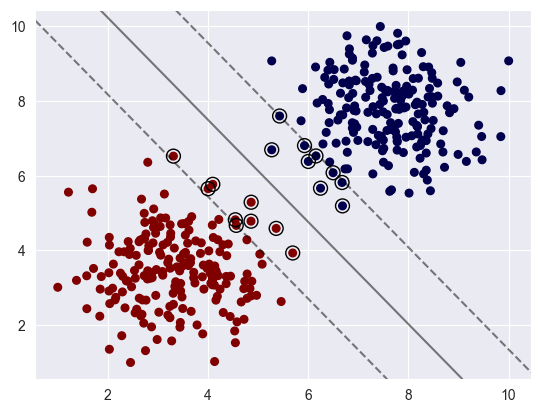

In [11]:
plot_svm_boundary(model, X, y)

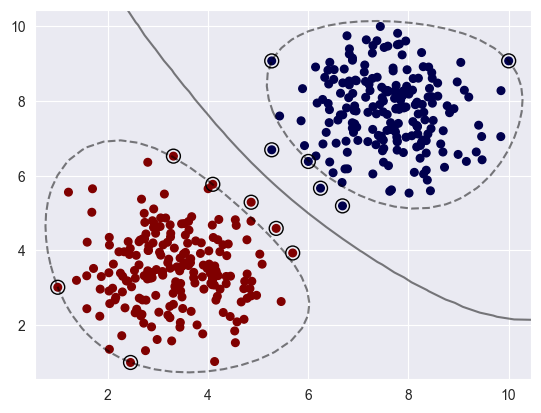

In [12]:
model = SVC()

model.fit(X, y)

plot_svm_boundary(model, X, y)

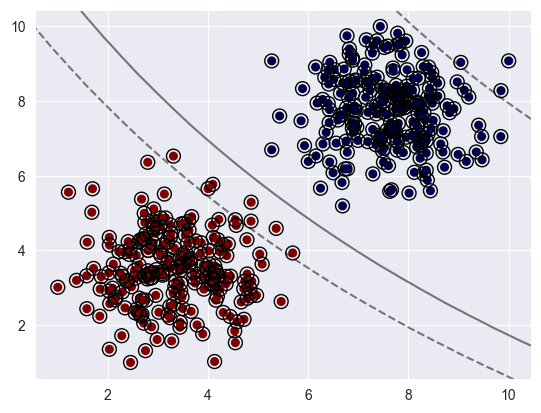

In [13]:
model = SVC(kernel='sigmoid')

model.fit(X, y)

plot_svm_boundary(model, X, y)

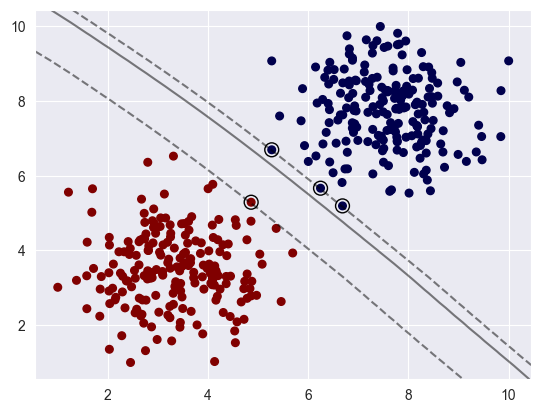

In [14]:
model = SVC(kernel='poly', degree=20)

model.fit(X, y)

plot_svm_boundary(model, X, y)

In [15]:
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [16]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [17]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## Regression with Support Vector Machines


In [18]:
df = pd.read_csv('cement_slump.csv')

In [19]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot: >

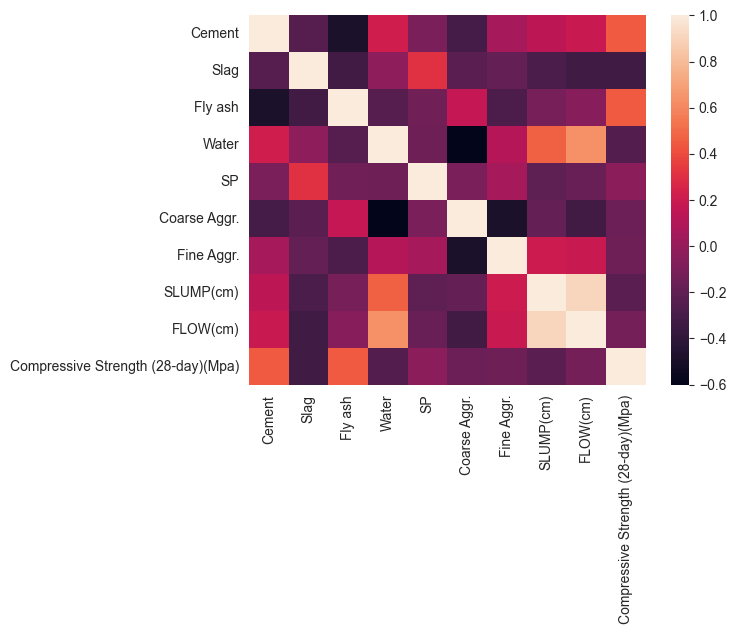

In [20]:
sns.heatmap(df.corr())

In [21]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [22]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scaled_X_test = scaler.transform(X_test)

In [27]:
base_model = SVR()

In [28]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [29]:
base_preds = base_model.predict(scaled_X_test)

In [30]:
mean_absolute_error(y_test, base_preds)

5.236902091259178

In [31]:
root_mean_squared_error(y_test, base_preds)

6.695914838327133

In [32]:
y_test.mean()

36.26870967741935

In [33]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]
}

In [34]:
svr = SVR()

In [35]:
grid = GridSearchCV(svr, param_grid)

In [36]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [37]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
grid_preds = grid.predict(scaled_X_test)

In [39]:
mean_absolute_error(y_test, grid_preds)

2.5128012210762365

In [40]:
root_mean_squared_error(y_test, grid_preds)

3.178210305119858

## Exercises

In [41]:
df = pd.read_csv('wine_fraud.csv')

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [43]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot: xlabel='quality', ylabel='count'>

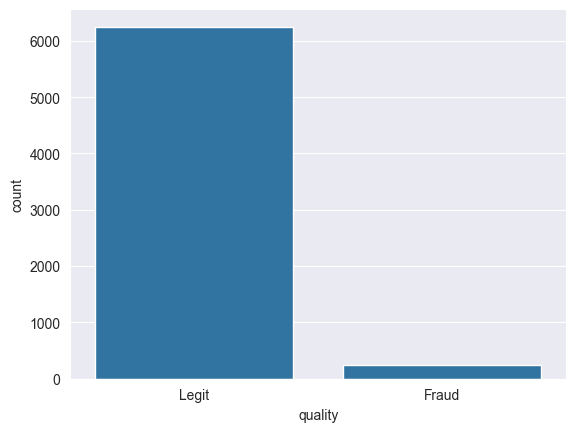

In [44]:
sns.countplot(df, x='quality')

<AxesSubplot: xlabel='type', ylabel='count'>

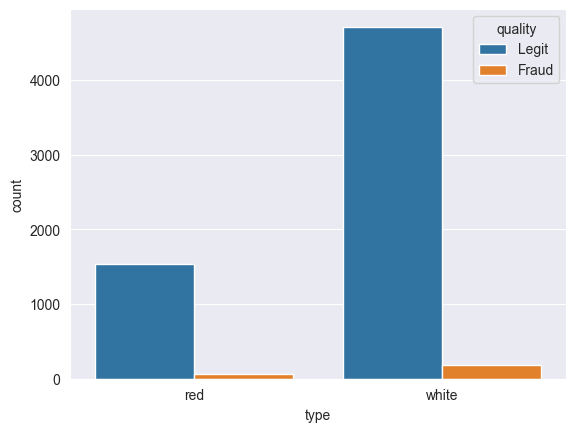

In [45]:
sns.countplot(df, x='type', hue='quality')

In [46]:
total_red_wines = len(df[df['type'] == 'red'])
fraud_red_wines = len(df[(df['type'] == 'red') & (df['quality'] == 'Fraud')])
total_white_wines = len(df[df['type'] == 'white'])
fraud_white_wines = len(df[(df['type'] == 'white') & (df['quality'] == 'Fraud')])

In [47]:
fraud_red_wines * 100 / total_red_wines

3.9399624765478425

In [48]:
fraud_white_wines * 100 / total_white_wines

3.736218864842793

In [49]:
df['quality'] = df['quality'].map({ 'Legit': 0, 'Fraud': 1 })

In [50]:
corr = df.corr(numeric_only=True)

In [51]:
corr['quality']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot: >

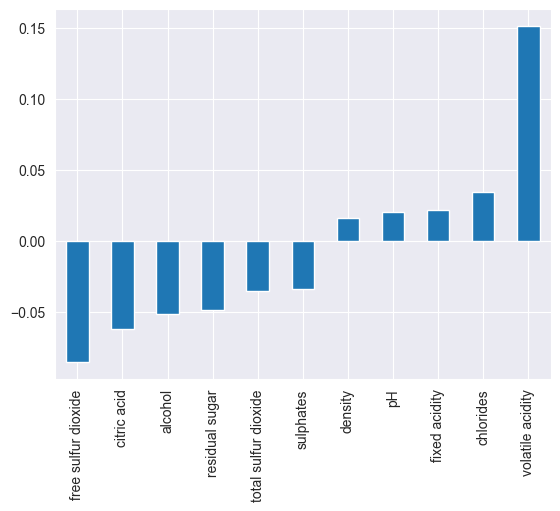

In [52]:
corr['quality'][:-1].sort_values().plot(kind='bar')

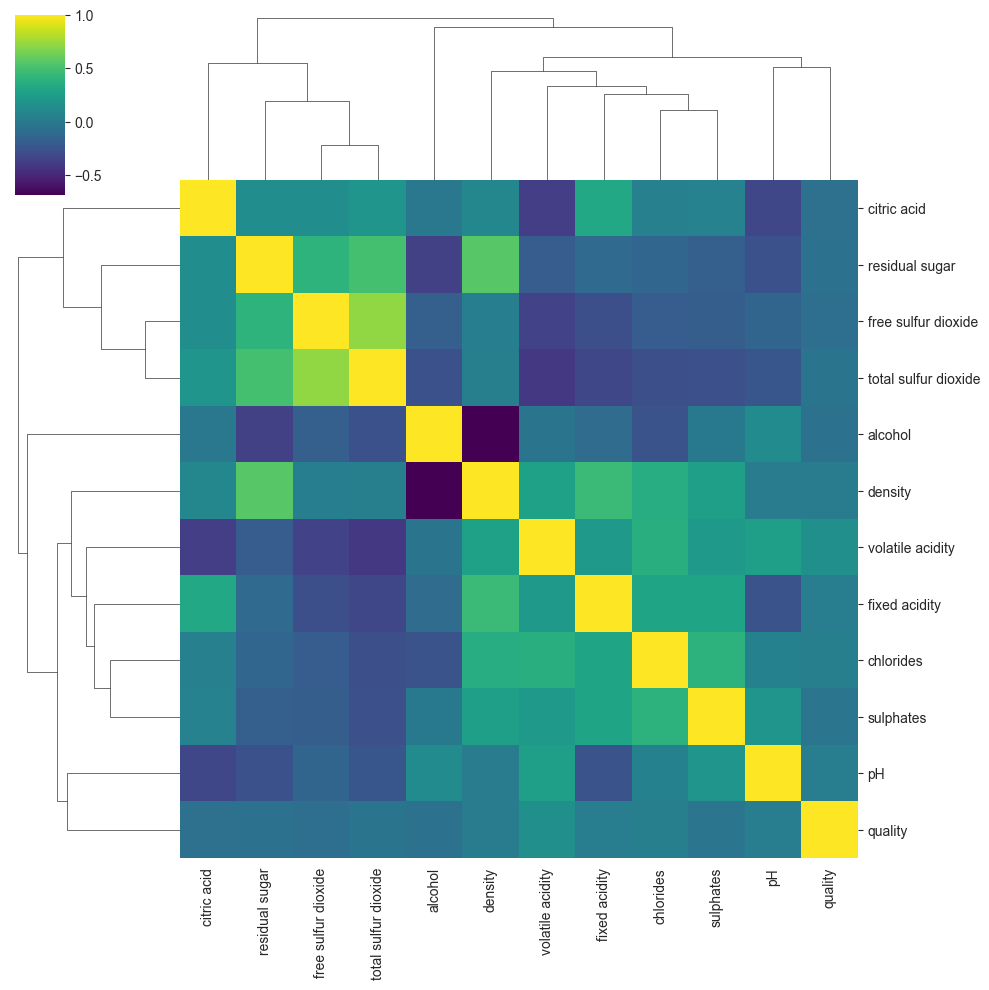

In [53]:
sns.clustermap(corr, cmap='viridis')

In [54]:
df[df['type'] == 'red'] = 0
df[df['type'] == 'white'] = 1

In [55]:
X = df.drop('quality', axis=1)
y = df['quality']

In [56]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [58]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
model = SVC(class_weight='balanced')

In [60]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
}

In [61]:
grid = GridSearchCV(model, param_grid)

In [62]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [63]:
grid.best_params_

{'C': 0.001, 'gamma': 'scale'}

In [64]:
grid_preds = grid.predict(scaled_X_test)

In [65]:
confusion_matrix(y_test, grid_preds)

array([[168,   0],
       [  0, 482]])

In [66]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       482

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

